In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

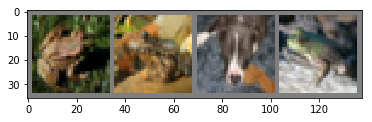

 frog  frog   dog  frog


In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
# Model definition:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)

In [0]:
criterion = nn.CrossEntropyLoss()

In [0]:
def train():
    loss_values = []
    for epoch in range(10):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
                
            
        loss_values.append(running_loss / len(trainloader))
       
    #plt.plot(loss_values)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))
    return loss_values

[1,  2000] loss: 1.982
[1,  4000] loss: 1.751
[1,  6000] loss: 1.597
[1,  8000] loss: 1.542
[1, 10000] loss: 1.474
[1, 12000] loss: 1.450
[2,  2000] loss: 1.355
[2,  4000] loss: 1.325
[2,  6000] loss: 1.323
[2,  8000] loss: 1.290
[2, 10000] loss: 1.276
[2, 12000] loss: 1.271
[3,  2000] loss: 1.166
[3,  4000] loss: 1.201
[3,  6000] loss: 1.180
[3,  8000] loss: 1.179
[3, 10000] loss: 1.173
[3, 12000] loss: 1.142
[4,  2000] loss: 1.090
[4,  4000] loss: 1.101
[4,  6000] loss: 1.083
[4,  8000] loss: 1.107
[4, 10000] loss: 1.083
[4, 12000] loss: 1.074
[5,  2000] loss: 1.010
[5,  4000] loss: 1.017
[5,  6000] loss: 0.997
[5,  8000] loss: 1.042
[5, 10000] loss: 1.025
[5, 12000] loss: 1.055
[6,  2000] loss: 0.975
[6,  4000] loss: 0.958
[6,  6000] loss: 0.987
[6,  8000] loss: 0.980
[6, 10000] loss: 1.000
[6, 12000] loss: 0.982
[7,  2000] loss: 0.902
[7,  4000] loss: 0.917
[7,  6000] loss: 0.936
[7,  8000] loss: 0.950
[7, 10000] loss: 0.963
[7, 12000] loss: 0.931
[8,  2000] loss: 0.854
[8,  4000] 

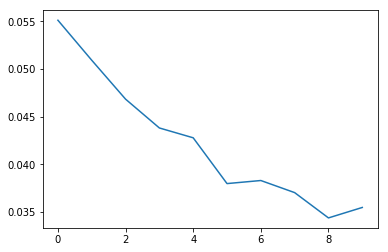

In [0]:
#sgd without momentum
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01, momentum = 0)
losses_sgd = train()
plt.plot(losses_sgd)

[1,  2000] loss: 2.142
[1,  4000] loss: 1.854
[1,  6000] loss: 1.681
[1,  8000] loss: 1.553
[1, 10000] loss: 1.518
[1, 12000] loss: 1.466
[2,  2000] loss: 1.405
[2,  4000] loss: 1.349
[2,  6000] loss: 1.325
[2,  8000] loss: 1.300
[2, 10000] loss: 1.277
[2, 12000] loss: 1.285
[3,  2000] loss: 1.196
[3,  4000] loss: 1.180
[3,  6000] loss: 1.190
[3,  8000] loss: 1.184
[3, 10000] loss: 1.167
[3, 12000] loss: 1.164
[4,  2000] loss: 1.088
[4,  4000] loss: 1.082
[4,  6000] loss: 1.113
[4,  8000] loss: 1.093
[4, 10000] loss: 1.080
[4, 12000] loss: 1.086
[5,  2000] loss: 1.014
[5,  4000] loss: 1.008
[5,  6000] loss: 1.033
[5,  8000] loss: 1.043
[5, 10000] loss: 1.040
[5, 12000] loss: 1.031
[6,  2000] loss: 0.948
[6,  4000] loss: 0.978
[6,  6000] loss: 0.991
[6,  8000] loss: 0.963
[6, 10000] loss: 0.984
[6, 12000] loss: 0.994
[7,  2000] loss: 0.913
[7,  4000] loss: 0.930
[7,  6000] loss: 0.950
[7,  8000] loss: 0.938
[7, 10000] loss: 0.947
[7, 12000] loss: 0.931
[8,  2000] loss: 0.853
[8,  4000] 

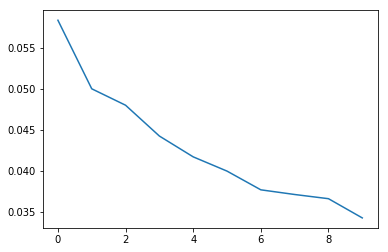

In [0]:
#sgd with momentum
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
losses_sgd_m = train()
plt.plot(losses_sgd_m)

[1,  2000] loss: 0.737
[1,  4000] loss: 0.740
[1,  6000] loss: 0.738
[1,  8000] loss: 0.768
[1, 10000] loss: 0.773
[1, 12000] loss: 0.755
[2,  2000] loss: 0.727
[2,  4000] loss: 0.732
[2,  6000] loss: 0.746
[2,  8000] loss: 0.730
[2, 10000] loss: 0.751
[2, 12000] loss: 0.729
[3,  2000] loss: 0.712
[3,  4000] loss: 0.733
[3,  6000] loss: 0.730
[3,  8000] loss: 0.719
[3, 10000] loss: 0.731
[3, 12000] loss: 0.737
[4,  2000] loss: 0.693
[4,  4000] loss: 0.714
[4,  6000] loss: 0.716
[4,  8000] loss: 0.726
[4, 10000] loss: 0.709
[4, 12000] loss: 0.719
[5,  2000] loss: 0.709
[5,  4000] loss: 0.698
[5,  6000] loss: 0.709
[5,  8000] loss: 0.708
[5, 10000] loss: 0.698
[5, 12000] loss: 0.705
[6,  2000] loss: 0.680
[6,  4000] loss: 0.667
[6,  6000] loss: 0.698
[6,  8000] loss: 0.695
[6, 10000] loss: 0.726
[6, 12000] loss: 0.700
[7,  2000] loss: 0.671
[7,  4000] loss: 0.688
[7,  6000] loss: 0.687
[7,  8000] loss: 0.681
[7, 10000] loss: 0.696
[7, 12000] loss: 0.699
[8,  2000] loss: 0.666
[8,  4000] 

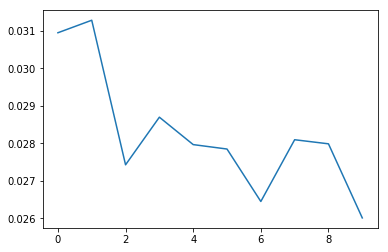

In [0]:
#adam
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0001)
losses_adam = train()
plt.plot(losses_adam)

[1,  2000] loss: 0.650
[1,  4000] loss: 0.609
[1,  6000] loss: 0.620
[1,  8000] loss: 0.636
[1, 10000] loss: 0.609
[1, 12000] loss: 0.619
[2,  2000] loss: 0.617
[2,  4000] loss: 0.640
[2,  6000] loss: 0.607
[2,  8000] loss: 0.624
[2, 10000] loss: 0.627
[2, 12000] loss: 0.604
[3,  2000] loss: 0.624
[3,  4000] loss: 0.606
[3,  6000] loss: 0.643
[3,  8000] loss: 0.609
[3, 10000] loss: 0.621
[3, 12000] loss: 0.613
[4,  2000] loss: 0.632
[4,  4000] loss: 0.623
[4,  6000] loss: 0.617
[4,  8000] loss: 0.603
[4, 10000] loss: 0.608
[4, 12000] loss: 0.624
[5,  2000] loss: 0.609
[5,  4000] loss: 0.614
[5,  6000] loss: 0.634
[5,  8000] loss: 0.621
[5, 10000] loss: 0.621
[5, 12000] loss: 0.609
[6,  2000] loss: 0.632
[6,  4000] loss: 0.607
[6,  6000] loss: 0.635
[6,  8000] loss: 0.619
[6, 10000] loss: 0.610
[6, 12000] loss: 0.594
[7,  2000] loss: 0.630
[7,  4000] loss: 0.610
[7,  6000] loss: 0.617
[7,  8000] loss: 0.618
[7, 10000] loss: 0.597
[7, 12000] loss: 0.630
[8,  2000] loss: 0.615
[8,  4000] 

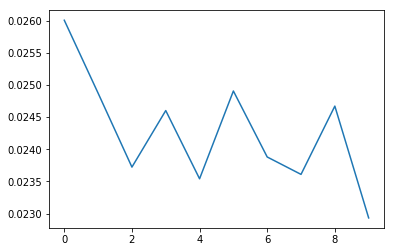

In [0]:
#adagrad
optimizer = torch.optim.Adagrad(net.parameters(), lr = 0.0001)
losses_adagrad = train()
plt.plot(losses_adagrad)

[1,  2000] loss: 0.892
[1,  4000] loss: 0.865
[1,  6000] loss: 0.863
[1,  8000] loss: 0.850
[1, 10000] loss: 0.852
[1, 12000] loss: 0.846
[2,  2000] loss: 0.811
[2,  4000] loss: 0.831
[2,  6000] loss: 0.823
[2,  8000] loss: 0.843
[2, 10000] loss: 0.846
[2, 12000] loss: 0.848
[3,  2000] loss: 0.816
[3,  4000] loss: 0.811
[3,  6000] loss: 0.823
[3,  8000] loss: 0.816
[3, 10000] loss: 0.819
[3, 12000] loss: 0.804
[4,  2000] loss: 0.782
[4,  4000] loss: 0.790
[4,  6000] loss: 0.816
[4,  8000] loss: 0.808
[4, 10000] loss: 0.810
[4, 12000] loss: 0.816
[5,  2000] loss: 0.780
[5,  4000] loss: 0.786
[5,  6000] loss: 0.819
[5,  8000] loss: 0.785
[5, 10000] loss: 0.786
[5, 12000] loss: 0.817
[6,  2000] loss: 0.767
[6,  4000] loss: 0.776
[6,  6000] loss: 0.786
[6,  8000] loss: 0.798
[6, 10000] loss: 0.795
[6, 12000] loss: 0.788
[7,  2000] loss: 0.771
[7,  4000] loss: 0.771
[7,  6000] loss: 0.777
[7,  8000] loss: 0.800
[7, 10000] loss: 0.795
[7, 12000] loss: 0.779
[8,  2000] loss: 0.755
[8,  4000] 

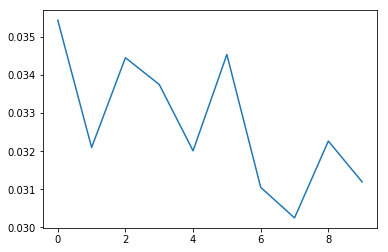

In [0]:
#RMSprop
optimizer = torch.optim.RMSprop(net.parameters(), lr = 0.0001)
losses_rmsprop = train()
plt.plot(losses_rmsprop)

In [0]:
plt.plot(losses_sgd)
plt.plot(losses_sgd_m)
plt.plot(losses_adam)
plt.plot(losses_adagrad)
plt.plot(losses_rmsprop)
plt.legend(['SGD without momentum','SGD with momentum','Adam','AdaGrad','RMSProp'],loc='upper right')